# Import libraries and data

In [ ]:
#importing the libraries we require in the project
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns

# confusion matrix for all models
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics

#standardscaler
from sklearn.preprocessing import StandardScaler

#roc auc scores
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#precision recall cruve
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve

#import gridsearch
from sklearn.model_selection import GridSearchCV

#plotting
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# logistic regression 
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# decision tree 
from sklearn.tree import DecisionTreeClassifier

#randomforest
from sklearn.ensemble import RandomForestClassifier

#KNN
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
#importing the data set trial
audit_trial=pd.read_csv('https://raw.githubusercontent.com/caichinger/MLMNC2020/master/projects/AuditDataDataSet/data/trial.csv')

#Checklist

In [ ]:
# 0. train test split
#X_train, X_test, y_train, y_test = train_test_split(X, y)

# 1. choose a model
#from sklearn.model_family import DesiredModel

# 2. instantiate a model with certain parameters
#model = DesiredModel(model_parameters)

# 3. fit a model to the data
#model.fit(X_train, y_train)

# 4. evaluate
#model.score(X_test, y_test), model.score(X_train, y_train)

# 5. use the model to make a prediction
#y_new = model.predict(X_new)

# Data Exploration and Preparation


In [ ]:
#Starting to explore the data by looking at a rough description
audit_trial.describe().round(2)

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.00,776.00,776.00,776.00,776.00,776.00,776.00,776.00,775.00,776.00,776.00,776.00,776.00,776.00,776.00,776.00,776.00
mean,20.18,2.45,3.51,10.80,3.13,13.22,5.07,2.24,14.14,2.91,2.51,0.03,2.06,0.10,2.17,2.70,0.63
std,24.32,5.68,1.74,50.08,1.70,51.31,0.26,0.80,66.61,1.60,1.23,0.18,0.38,0.53,0.68,0.86,0.48
min,1.85,0.00,2.00,0.00,2.00,0.00,5.00,2.00,0.00,2.00,2.00,0.00,2.00,0.00,2.00,2.00,0.00
25%,2.37,0.21,2.00,0.00,2.00,0.54,5.00,2.00,0.00,2.00,2.00,0.00,2.00,0.00,2.00,2.00,0.00
50%,3.89,0.88,2.00,0.40,2.00,1.37,5.00,2.00,0.09,2.00,2.00,0.00,2.00,0.00,2.00,2.40,1.00
75%,55.57,2.48,6.00,4.16,4.00,7.71,5.00,2.00,5.60,4.00,2.00,0.00,2.00,0.00,2.00,3.25,1.00
max,59.85,85.00,6.00,1264.63,6.00,1268.91,9.00,6.00,935.03,6.00,6.00,2.00,6.00,9.00,6.00,5.20,1.00


We can see that several variables contain outliers as their maximum value is far higher than the mean plus 3*standard deviation. This can be observed for PARA_A, PARA_B, TOTAL and Money_Value. Since our Machine Learning model will be able to deal with these outliers, this should not be a problem.


In [ ]:
#Looking at the first 5 entries of the data set to get an overview of each variable
audit_trial.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


## *Data preprocessing*

In [ ]:
audit_trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   LOCATION_ID    776 non-null    object 
 2   PARA_A         776 non-null    float64
 3   SCORE_A        776 non-null    int64  
 4   PARA_B         776 non-null    float64
 5   SCORE_B        776 non-null    int64  
 6   TOTAL          776 non-null    float64
 7   numbers        776 non-null    float64
 8   Marks          776 non-null    int64  
 9   Money_Value    775 non-null    float64
 10  MONEY_Marks    776 non-null    int64  
 11  District       776 non-null    int64  
 12  Loss           776 non-null    int64  
 13  LOSS_SCORE     776 non-null    int64  
 14  History        776 non-null    int64  
 15  History_score  776 non-null    int64  
 16  Score          776 non-null    float64
 17  Risk           776 non-null    int64  
dtypes: float64

We can see that the variable **LOCATION_ID** contains an object even though it should only contain numerical variables, as we have seen in the head of the data set. Therefore, we go on to explore this variable further.

In [ ]:
audit_trial.LOCATION_ID.value_counts()

8          76
19         68
9          53
16         52
12         47
5          44
2          41
4          37
15         35
13         35
6          33
32         29
11         26
22         24
29         21
14         20
18         16
31         12
1          11
37         10
39          9
28          8
21          8
27          8
43          7
25          6
20          5
38          4
7           4
30          4
36          4
3           3
40          3
35          2
LOHARU      1
33          1
34          1
23          1
SAFIDON     1
41          1
24          1
NUH         1
44          1
42          1
17          1
Name: LOCATION_ID, dtype: int64

In [ ]:
#Unique values in LOCATION_ID column
audit_trial["LOCATION_ID"].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [ ]:
#deleting objects
audit_trial = audit_trial[(audit_trial.LOCATION_ID != 'LOHARU')]
audit_trial = audit_trial[(audit_trial.LOCATION_ID != 'NUH')]
audit_trial = audit_trial[(audit_trial.LOCATION_ID != 'SAFIDON')]
audit_trial = audit_trial.astype(float)

In [ ]:
audit_trial.isna().sum()

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

Money value contains an NaN Value which needs to be dropped

In [ ]:
#We need to drop the row where Money_Value = NaN
audit_trial = audit_trial[audit_trial['Money_Value'].notna()]

In [ ]:
audit_trial.isna().sum()

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      0
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

In [ ]:
#final check
audit_trial.shape 

(772, 18)

## *Variable inspection*

We go on to inspect the variables in more detail and first look at the histograms of the variables and go on to explore the correlation matrix. We can see that some variables depend directly on each other.

---



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd36bb30f0>,
      dtype=object)

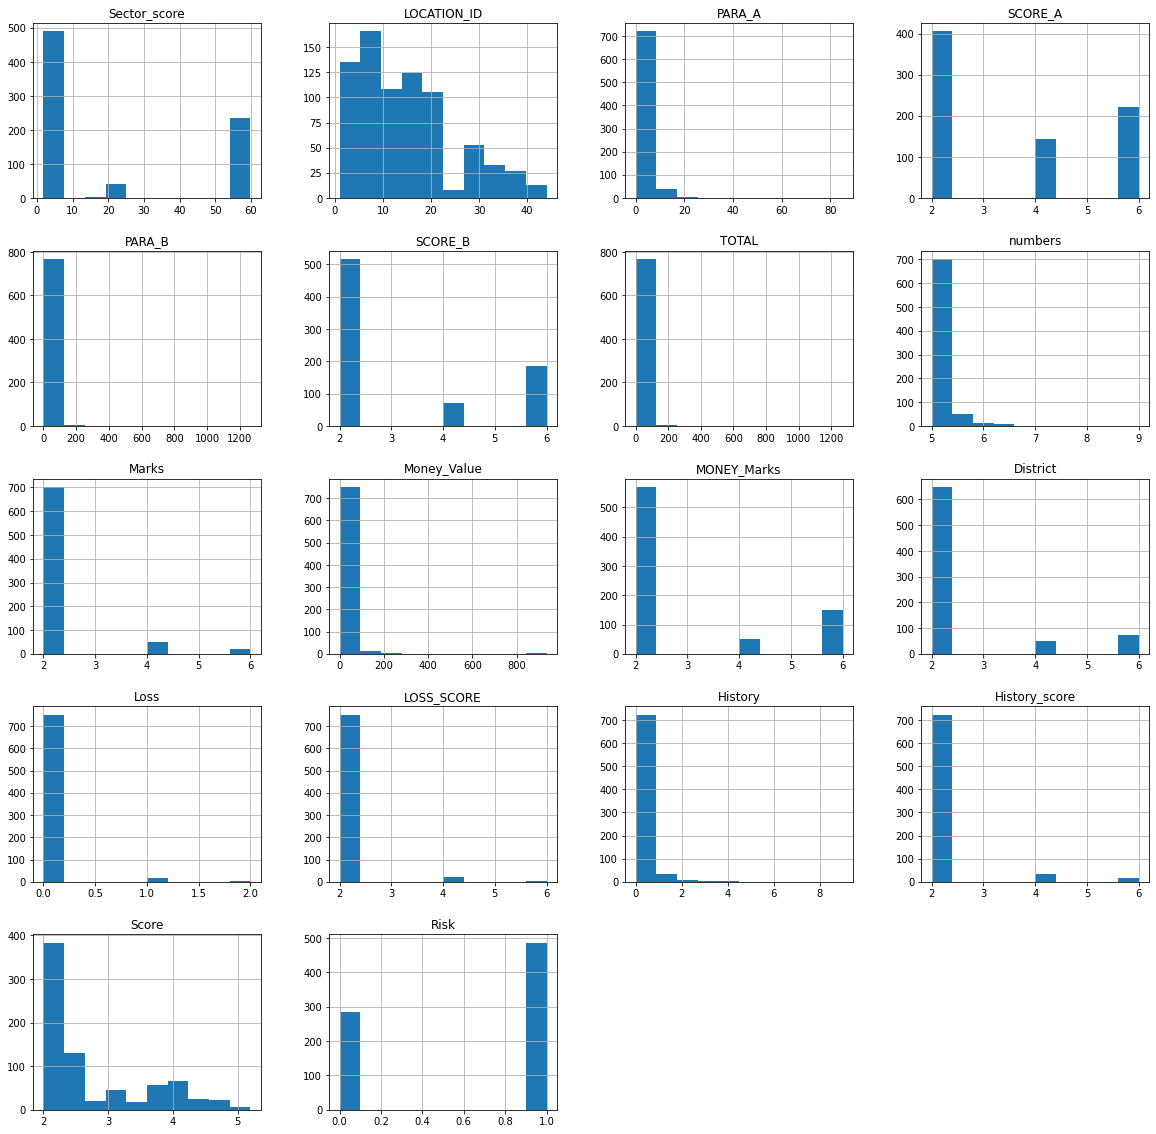

In [ ]:
#looking at the visualization of each variable can help us to get an understanding of their characteristics
audit_trial[audit_trial.dtypes[(audit_trial.dtypes=="float")].index.values].hist(figsize=[20,20])

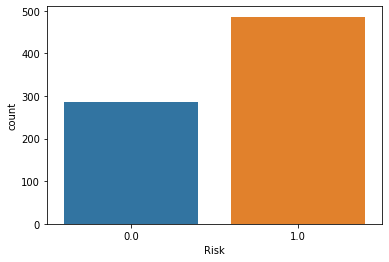

In [ ]:
#we identify risk as our binary dependent variable and can see that it's relatively balanced 
sns.countplot(audit_trial['Risk'], label = "Count")

In [ ]:
#correlation matrix
audit_trial.corr('spearman').style.background_gradient().format('{:.2f}')

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
Sector_score,1.00,-0.02,-0.39,-0.38,-0.14,-0.10,-0.31,-0.07,-0.07,-0.17,-0.14,-0.15,-0.08,-0.09,-0.05,-0.05,-0.31,-0.37
LOCATION_ID,-0.02,1.00,0.07,0.07,0.10,0.11,0.11,-0.03,-0.03,0.06,0.09,-0.09,0.00,-0.01,-0.03,-0.03,0.07,0.05
PARA_A,-0.39,0.07,1.00,0.91,0.53,0.54,0.82,0.28,0.28,0.46,0.45,0.08,0.10,0.10,0.27,0.27,0.72,0.65
SCORE_A,-0.38,0.07,0.91,1.00,0.54,0.56,0.79,0.29,0.29,0.48,0.49,0.08,0.10,0.10,0.28,0.28,0.77,0.69
PARA_B,-0.14,0.10,0.53,0.54,1.00,0.83,0.85,0.32,0.32,0.58,0.55,-0.04,0.07,0.06,0.30,0.30,0.72,0.46
SCORE_B,-0.10,0.11,0.54,0.56,0.83,1.00,0.78,0.33,0.33,0.58,0.57,-0.00,0.10,0.09,0.32,0.32,0.82,0.53
TOTAL,-0.31,0.11,0.82,0.79,0.85,0.78,1.00,0.32,0.32,0.59,0.55,0.02,0.10,0.10,0.30,0.30,0.84,0.69
numbers,-0.07,-0.03,0.28,0.29,0.32,0.33,0.32,1.00,1.00,0.42,0.51,0.14,0.03,0.05,0.23,0.23,0.46,0.24
Marks,-0.07,-0.03,0.28,0.29,0.32,0.33,0.32,1.00,1.00,0.42,0.51,0.14,0.03,0.05,0.23,0.23,0.46,0.24
Money_Value,-0.17,0.06,0.46,0.48,0.58,0.58,0.59,0.42,0.42,1.00,0.80,0.06,0.12,0.13,0.31,0.31,0.68,0.46


**Our observations:**

* PARA_A is very highly correlated with SCORE_A and PARA_B is very highly correlated with SCORE_B. So we can assume that one variable is explained by the other and can therefore be left out when fitting the model. 

* The abovementioned variables also seem to have a very high correlation with TOTAL and we can therefore assume that it is derived from those variables. We will inspect those variables in more detail later.

* We detect Risk as our dependent variable and see that Score is very highly correlated. Moreover, PARA_A, SCORE_A, PARA_B, SCORE_B, Money_Value and MONEY_Marks show high correlations, so we assume that they are relevant variables for our models. 

* Further, we can see a direct correlation between numbers and marks, Loss and LOSS_SCORE and History and History_Score. Moreover, a very high correlation between Money_Value and MONEY_MARKS can be observed. So we assume that one of them can be left out of the model respectively to avoid overfitting. 

* District and Location_ID seem to have very little correlation with any of the variables.

* Score and Risk also have a high correlation and when looking at the case study, we see that Risk is directly derived from Score, so we decide to leave it out of our model as well.



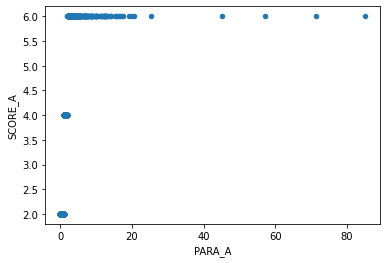

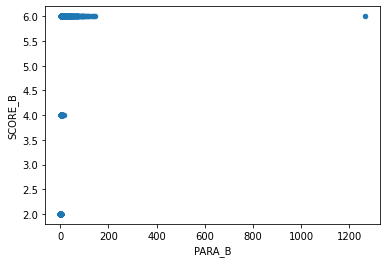

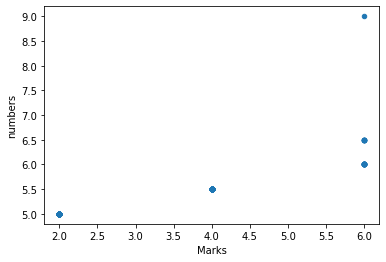

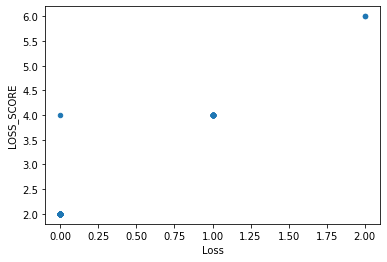

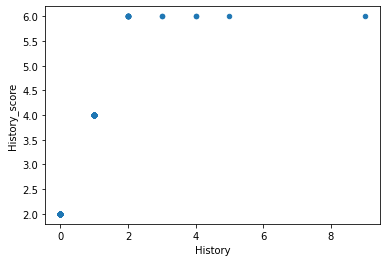

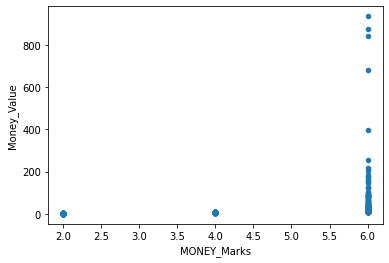

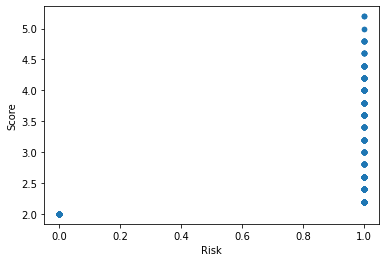

In [ ]:
#we look at the scatterplots of the variables that have high correlations to substantiate our decisions to drop variables
audit_trial.plot.scatter(y='SCORE_A', x='PARA_A')
audit_trial.plot.scatter(y='SCORE_B', x='PARA_B')
audit_trial.plot.scatter(y='numbers', x='Marks')
audit_trial.plot.scatter(y='LOSS_SCORE', x='Loss')
audit_trial.plot.scatter(y='History_score', x='History')
audit_trial.plot.scatter(y='Money_Value', x='MONEY_Marks')
audit_trial.plot.scatter(y='Score', x='Risk')

In [ ]:
#further inspection of the relationships of variables
audit_trial[['PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B', 'TOTAL']].head()

,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL
0,4.18,6.0,2.50,2.0,6.68
1,0.00,2.0,4.83,2.0,4.83
2,0.51,2.0,0.23,2.0,0.74
3,0.00,2.0,10.80,6.0,10.80
4,0.00,2.0,0.08,2.0,0.08


We see that TOTAL is only a sum of PARA_A and PARA_B and has little meaning by itself, therefore we can delete it.

In [ ]:
#deleting all variables that have high correlations and would lead to overfitting of the model
cols_del=['SCORE_A', 'SCORE_B','Marks','MONEY_Marks','LOSS_SCORE','History_score', 'Score', 'TOTAL', 'LOCATION_ID']

audit_trial.drop(cols_del, axis=1, inplace=True)

In [ ]:
#we derive our final data set that we will use for modelling
audit_trial.describe().round(3)

,Sector_score,PARA_A,PARA_B,numbers,Money_Value,District,Loss,History,Risk
count,772.000,772.000,772.000,772.000,772.000,772.000,772.000,772.000,772.000
mean,20.209,2.461,10.856,5.068,14.191,2.508,0.030,0.105,0.630
std,24.322,5.692,50.207,0.265,66.730,1.231,0.185,0.532,0.483
min,1.850,0.000,0.000,5.000,0.000,2.000,0.000,0.000,0.000
25%,2.370,0.208,0.000,5.000,0.000,2.000,0.000,0.000,0.000
50%,3.890,0.880,0.415,5.000,0.090,2.000,0.000,0.000,1.000
75%,55.570,2.482,4.170,5.000,5.630,2.000,0.000,0.000,1.000
max,59.850,85.000,1264.630,9.000,935.030,6.000,2.000,9.000,1.000


## *Defining independent variables and train-test split*

In [ ]:
# defining dependent and independent variable
xnames = ['Sector_score','PARA_A','PARA_B','numbers','Money_Value','District','Loss','History']
yname = 'Risk'

In [ ]:
#Train-Test Split by using a classic 70:30 split
from sklearn.model_selection import train_test_split

X = audit_trial[xnames]
y = audit_trial[yname]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(540, 8) (232, 8)


#Logistic Regression



(-1.0, 2.5)

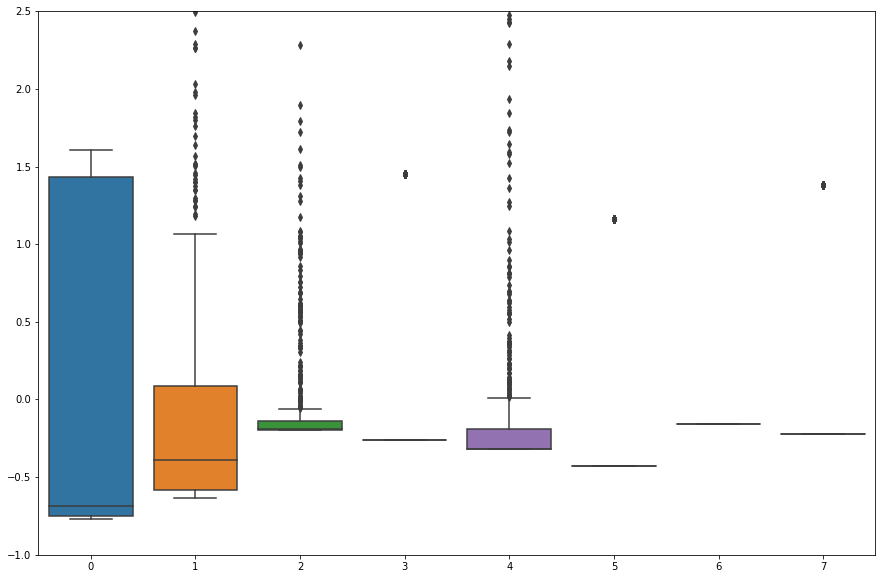

In [ ]:
standard_scaler=StandardScaler()
X_train=standard_scaler.fit_transform(X_train)
X_test=standard_scaler.transform(X_test)

x2=pd.DataFrame(X_train)
plt.figure(figsize=(15,10))
sns.boxplot(data = x2)
plt.ylim(-1,2.5)

In [ ]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred_log=logreg.predict(X_test)

In [ ]:
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.9351851851851852, 0.9267241379310345)

In [ ]:
cnf_matrix_log = metrics.confusion_matrix(y_test, y_pred_log)
cnf_matrix_log

array([[ 76,   0],
       [ 17, 139]])

Text(0.5, 257.44, 'Predicted label')

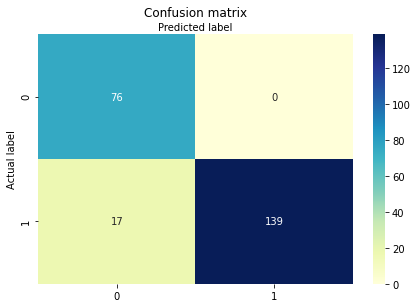

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_log))
print("Precision:",metrics.precision_score(y_test, y_pred_log))
print("Recall:",metrics.recall_score(y_test, y_pred_log))

Accuracy: 0.9267241379310345
Precision: 1.0
Recall: 0.8910256410256411


In [ ]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90        76
         1.0       1.00      0.89      0.94       156

    accuracy                           0.93       232
   macro avg       0.91      0.95      0.92       232
weighted avg       0.94      0.93      0.93       232



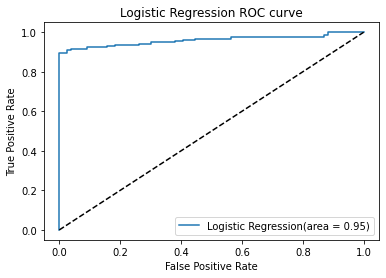

In [ ]:
y_pred_proba_logreg = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_logreg)


logreg_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression' '(area = %0.2f)' % logreg_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc="lower right")
plt.savefig('Logistic Regression_ROC')
plt.show()

**Now optimizing the model with GridSearchCV**

In [ ]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = [
              {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
               'C': c_space, 
               'solver':['lbfgs', 'newton-cg','liblinear','sag','saga'],
               'max_iter' : [100,1000,2500,5000]
               }
]

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5, verbose=True, n_jobs=-1)

# fit the model with data
logreg_cv.fit(X_train,y_train)

# Print the tuned parameter and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 460 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 2472 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 3242 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 4233 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 5448 tasks      | elapsed: 25.2min


Tuned Logistic Regression Parameters: {'C': 1e-05, 'max_iter': 100, 'penalty': 'none', 'solver': 'lbfgs'}
Best score is 0.9685185185185186


[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed: 31.7min finished


In [ ]:
y_pred_cv=logreg_cv.predict(X_test)

In [ ]:
logreg_cv.score(X_train, y_train), logreg_cv.score(X_test, y_test)

(0.9703703703703703, 0.9353448275862069)

In [ ]:
cnf_matrix_cv = metrics.confusion_matrix(y_test, y_pred_cv)
cnf_matrix_cv

array([[ 68,   8],
       [  7, 149]])

Text(0.5, 257.44, 'Predicted label')

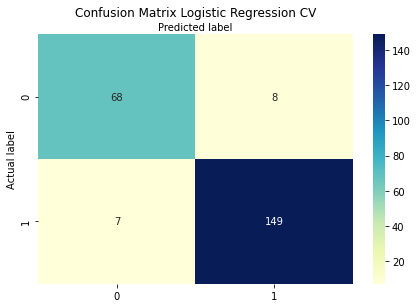

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_cv), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix Logistic Regression CV', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_cv))
print("Precision:",metrics.precision_score(y_test, y_pred_cv))
print("Recall:",metrics.recall_score(y_test, y_pred_cv))

Accuracy: 0.9353448275862069
Precision: 0.9490445859872612
Recall: 0.9551282051282052


In [ ]:
print(classification_report(y_test, y_pred_cv))

              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90        76
         1.0       0.95      0.96      0.95       156

    accuracy                           0.94       232
   macro avg       0.93      0.92      0.93       232
weighted avg       0.94      0.94      0.94       232



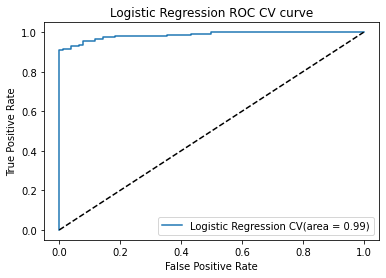

In [ ]:
y_pred_proba_cv = logreg_cv.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_cv)

logreg_cv_roc_auc = metrics.roc_auc_score(y_test, y_pred_proba_cv)
fpr, tpr, thresholds = roc_curve(y_test, logreg_cv.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression CV' '(area = %0.2f)' % logreg_cv_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC CV curve')
plt.legend(loc="lower right")
plt.savefig('Logistic Regression CV ROC')
plt.show()

Average precision-recall score RF: 0.9937027428898785


Text(0.5, 1.0, '2-class Precision-Recall curve Logistic Regression CV: AP=0.99')

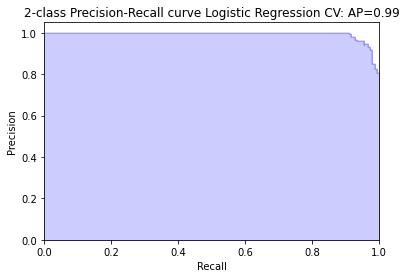

In [ ]:
y_score_lr = logreg_cv.predict_proba(X_test)[:,-1]

average_precision = average_precision_score(y_test, y_score_lr)

print('Average precision-recall score RF: {}'.format(average_precision))

precision, recall, _ = precision_recall_curve(y_test, y_score_lr)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve Logistic Regression CV: AP={0:0.2f}'.format(
          average_precision))

AttributeError: ignored

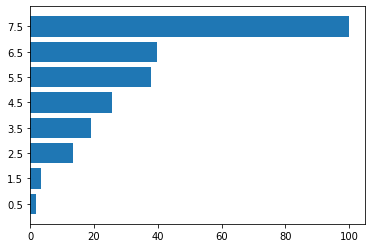

In [ ]:
feature_importance = abs(logreg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

# Decision Tree Classifier

In [ ]:
print(X_train.shape, X_test.shape)

(540, 8) (232, 8)


In [ ]:
model_tree = DecisionTreeClassifier(max_depth=1, min_samples_split=2)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
model_tree.score(X_train, y_train), model_tree.score(X_test, y_test)

(0.8592592592592593, 0.8189655172413793)

In [ ]:
yp_tree = model_tree.predict(X_test)

In [ ]:
conf_mat = confusion_matrix(y_test, yp_tree)
conf_mat

array([[ 76,   0],
       [ 42, 114]])

In [ ]:
y_pred_tree=model_tree.predict(X_test)
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

         0.0       0.64      1.00      0.78        76
         1.0       1.00      0.73      0.84       156

    accuracy                           0.82       232
   macro avg       0.82      0.87      0.81       232
weighted avg       0.88      0.82      0.82       232



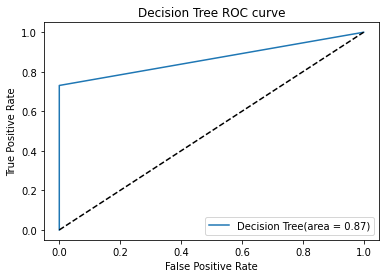

In [ ]:
y_pred_proba_mt = model_tree.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_mt)


model_tree_roc_auc = roc_auc_score(y_test, model_tree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_tree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree' '(area = %0.2f)' % model_tree_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC curve')
plt.legend(loc="lower right")
plt.savefig('Logistic Regression_ROC')
plt.show()

**Now tuning with GridSearchCV**

In [ ]:
# use GridSearchCV to optimize the model parameters max_depth and min_samples_split
grid_search_cv = GridSearchCV(DecisionTreeClassifier(max_depth=1, min_samples_split=2), 
                              {'max_depth': [1, 2, 3, 4, 5], 
                               'min_samples_split': [1, 2, 3, 4, 5]}, 
                              cv=10)
grid_search_cv.fit(X, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=1,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         

In [ ]:
# retrieve best parameter combinations
grid_search_cv.best_params_

{'max_depth': 4, 'min_samples_split': 2}

In [ ]:
best_model_tree = DecisionTreeClassifier(max_depth=4, min_samples_split=2)
best_model_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
best_model_tree.score(X_train, y_train), best_model_tree.score(X_test, y_test)

(0.9777777777777777, 0.9698275862068966)

In [ ]:
yp_best_tree = best_model_tree.predict(X_test)

In [ ]:
conf_mat_tree = confusion_matrix(y_test, yp_best_tree)
conf_mat_tree

array([[ 71,   5],
       [  2, 154]])

Text(0.5, 257.44, 'Predicted label')

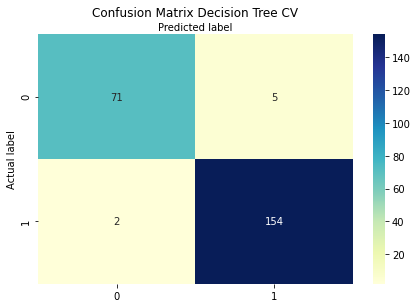

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat_tree), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix Decision Tree CV', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
y_pred_best_tree=best_model_tree.predict(X_test)
print(classification_report(y_test, y_pred_best_tree))

              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95        76
         1.0       0.97      0.99      0.98       156

    accuracy                           0.97       232
   macro avg       0.97      0.96      0.97       232
weighted avg       0.97      0.97      0.97       232



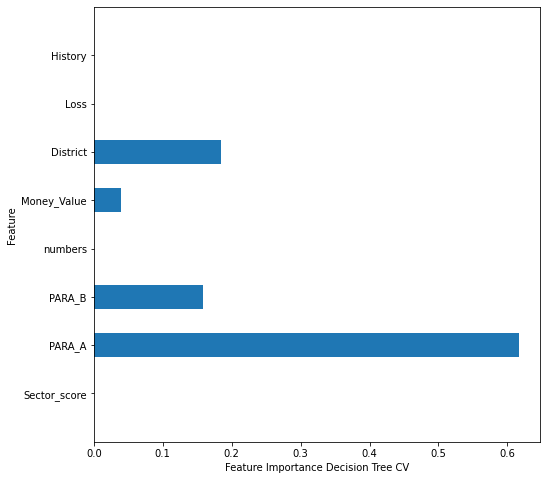

In [ ]:
tree_feature= DecisionTreeClassifier(max_depth=4,min_samples_split=2)
tree_feature.fit(X_train,y_train)
cols=xnames
def plot_feature_importances(model):
    plt.figure(figsize=(8,8))
    n_features = X.shape[1]
    plt.barh(range(n_features), best_model_tree.feature_importances_, height=0.5,align='center')
    plt.yticks(np.arange(n_features), cols)
    plt.xlabel("Feature Importance Decision Tree CV")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(tree_feature)

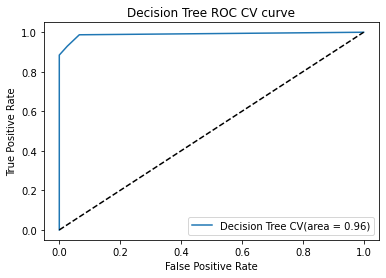

In [ ]:
y_pred_proba_bmt = best_model_tree.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_bmt)


best_model_tree_roc_auc = roc_auc_score(y_test, best_model_tree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, best_model_tree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree CV' '(area = %0.2f)' % best_model_tree_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC CV curve')
plt.legend(loc="lower right")
plt.savefig('Logistic Regression_ROC')
plt.show()

Average precision-recall score RF: 0.9933754527118223


Text(0.5, 1.0, '2-class Precision-Recall curve Decision Tree CV: AP=0.99')

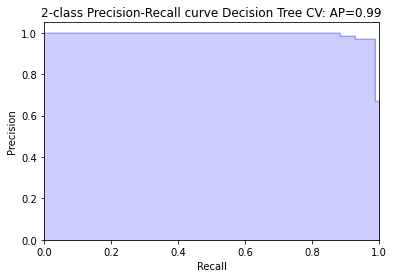

In [ ]:
y_score_dt = best_model_tree.predict_proba(X_test)[:,-1]

average_precision = average_precision_score(y_test, y_score_dt)

print('Average precision-recall score RF: {}'.format(average_precision))

precision, recall, _ = precision_recall_curve(y_test, y_score_dt)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve Decision Tree CV: AP={0:0.2f}'.format(
          average_precision))

# Random Forest 


In [ ]:
clf=RandomForestClassifier(n_estimators=10)

clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.9962962962962963, 0.978448275862069)

In [ ]:
y_pred_forest = clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred_forest))
print(classification_report(y_test,y_pred_forest))
print(accuracy_score(y_test, y_pred_forest))

[[ 74   2]
 [  4 152]]
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        76
         1.0       0.99      0.97      0.98       156

    accuracy                           0.97       232
   macro avg       0.97      0.97      0.97       232
weighted avg       0.97      0.97      0.97       232

0.9741379310344828


In [ ]:
conf_mat_rf= confusion_matrix(y_test, y_pred_forest)
conf_mat_rf

array([[ 74,   2],
       [  4, 152]])

Text(0.5, 257.44, 'Predicted label')

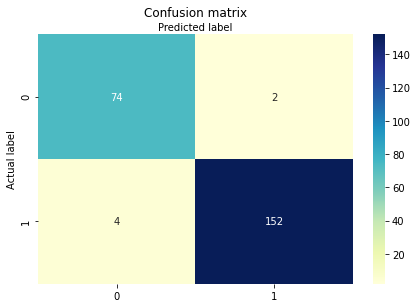

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat_rf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

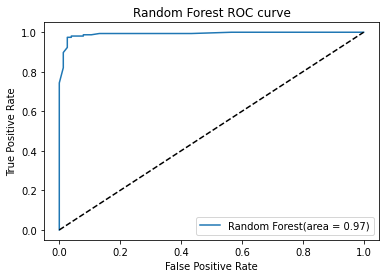

In [ ]:
y_pred_proba_rf = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)


clf_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest' '(area = %0.2f)' % clf_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve')
plt.legend(loc="lower right")
plt.savefig('Logistic Regression_ROC')
plt.show()

In [ ]:
#Now doing cross validation to find the ideal parameters
clf= RandomForestClassifier ()
parameters={'max_depth':[5,10,20,50,100], 'n_estimators':[0,50,100,200]}

grid_search = GridSearchCV(clf,parameters,cv=10,return_train_score=True)

grid_search = grid_search.fit(X_train, y_train)
Score_forest = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Score Forest {}'.format(Score_forest))
print('Best Parameters {}'.format(best_parameters))

Score Forest 0.9907407407407408
Best Parameters {'max_depth': 10, 'n_estimators': 200}


In [ ]:
clf_final = RandomForestClassifier (max_depth= 10, n_estimators=200)

clf_final.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
clf_final.score(X_train, y_train), clf_final.score(X_test, y_test)

(1.0, 0.978448275862069)

In [ ]:
y_pred_forest_cv= clf_final.predict(X_test)

print(confusion_matrix(y_test,y_pred_forest_cv))
print(classification_report(y_test,y_pred_forest_cv))
print(accuracy_score(y_test, y_pred_forest_cv))

[[ 74   2]
 [  3 153]]
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97        76
         1.0       0.99      0.98      0.98       156

    accuracy                           0.98       232
   macro avg       0.97      0.98      0.98       232
weighted avg       0.98      0.98      0.98       232

0.978448275862069


In [ ]:
conf_mat_forest = confusion_matrix(y_test, y_pred_forest_cv)
conf_mat_forest

array([[ 74,   2],
       [  3, 153]])

Text(0.5, 257.44, 'Predicted label')

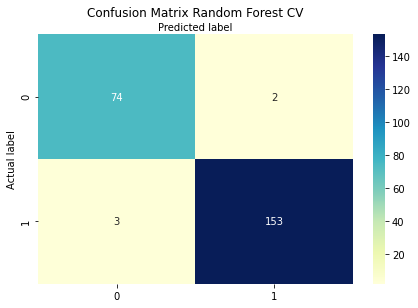

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat_forest), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix Random Forest CV', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

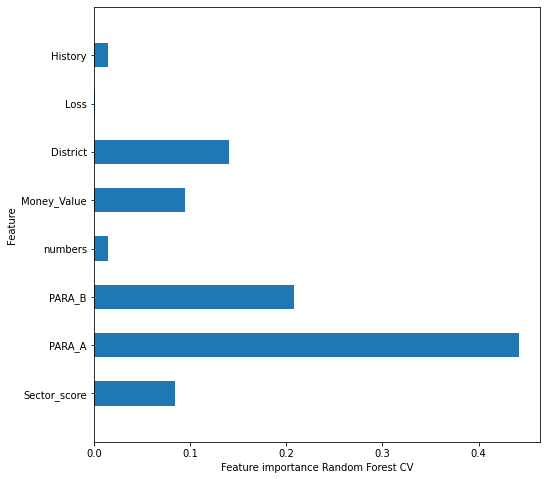

In [ ]:
forest_feature= RandomForestClassifier(n_estimators=100, max_depth=10)
tree_feature.fit(X_train,y_train)
cols=xnames
def plot_feature_importances(model):
    plt.figure(figsize=(8,8))
    n_features = X.shape[1]
    plt.barh(range(n_features), clf_final.feature_importances_, height=0.5,align='center')
    plt.yticks(np.arange(n_features), cols)
    plt.xlabel("Feature importance Random Forest CV")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(forest_feature)

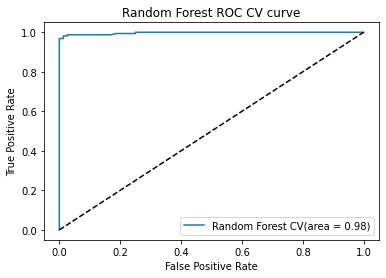

In [ ]:
y_pred_proba_rf_cv = clf_final.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf_cv)


clf_final_roc_auc = roc_auc_score(y_test, clf_final.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf_final.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest CV' '(area = %0.2f)' % clf_final_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC CV curve')
plt.legend(loc="lower right")
plt.savefig('Logistic Regression_ROC')
plt.show()

Average precision-recall score RF: 0.9988311776294558


Text(0.5, 1.0, '2-class Precision-Recall curve Random Forest CV: AP=1.00')

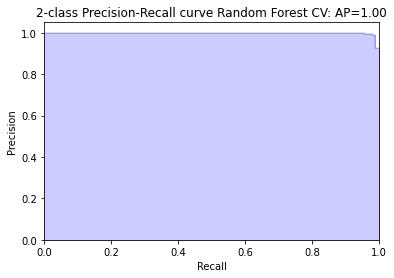

In [ ]:
y_score_rf1 = clf_final.predict_proba(X_test)[:,-1]

average_precision = average_precision_score(y_test, y_score_rf1)

print('Average precision-recall score RF: {}'.format(average_precision))

precision, recall, _ = precision_recall_curve(y_test, y_score_rf1)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve Random Forest CV: AP={0:0.2f}'.format(
          average_precision))

# KNN

In [ ]:
audit_trial.head()

,Sector_score,PARA_A,PARA_B,numbers,Money_Value,District,Loss,History,Risk
0,3.89,4.18,2.50,5.0,3.38,2.0,0.0,0.0,1.0
1,3.89,0.00,4.83,5.0,0.94,2.0,0.0,0.0,0.0
2,3.89,0.51,0.23,5.0,0.00,2.0,0.0,0.0,0.0
3,3.89,0.00,10.80,6.0,11.75,2.0,0.0,0.0,1.0
4,3.89,0.00,0.08,5.0,0.00,2.0,0.0,0.0,0.0


In [ ]:
X = audit_trial.iloc[:,0:8].values
y = audit_trial.iloc[:,9].values

IndexError: ignored

In [ ]:
standard_scaler=StandardScaler()
X_train=standard_scaler.fit_transform(X_train)
X_test=standard_scaler.transform(X_test)

x2=pd.DataFrame(X_train)
plt.figure(figsize=(15,10))
sns.boxplot(data = x2)
plt.ylim(-1,2.5)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)

In [ ]:
y_pred_KNN = classifier.predict(X_test)

In [ ]:
classifier.score(X_train, y_train), classifier.score(X_test, y_test)

In [ ]:
print ("Accuracy : ", accuracy_score(y_test, y_pred_KNN))

In [ ]:
print(confusion_matrix(y_test, y_pred_KNN))
print(classification_report(y_test, y_pred_KNN))

In [ ]:
classifier_matrix = metrics.confusion_matrix(y_test, y_pred_KNN)
classifier_matrix

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(classifier_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
k_range = range(1, 26)

scores = []


for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_classifier_loop = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred_classifier_loop))

print(scores)

In [ ]:
# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
y_pred_proba_classifier = classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_classifier)


classifier_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN' '(area = %0.2f)' % classifier_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC curve')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

**Now tuning with GridSearchCV**

In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
classifier_new = KNeighborsClassifier()
#Use GridSearch
classifier_cv= GridSearchCV(classifier_new, hyperparameters, cv=10)
#Fit the model
classifier_cv.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', classifier_cv.best_estimator_.get_params()['leaf_size'])
print('Best p:', classifier_cv.best_estimator_.get_params()['p'])
print('Best n_neighbors:', classifier_cv.best_estimator_.get_params()['n_neighbors'])

In [ ]:
y_pred_classifier_cv = classifier_cv.predict(X_test)

In [ ]:
classifier_cv.score(X_train, y_train), classifier_cv.score(X_test, y_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_classifier_cv))
print("Precision:",metrics.precision_score(y_test, y_pred_classifier_cv))
print("Recall:",metrics.recall_score(y_test, y_pred_classifier_cv))

In [ ]:
print(confusion_matrix(y_test, y_pred_classifier_cv))
print(classification_report(y_test, y_pred_classifier_cv))

In [ ]:
classifier_matrix_cv = metrics.confusion_matrix(y_test, y_pred_classifier_cv)
classifier_matrix_cv

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(classifier_matrix_cv), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
y_pred_proba_classifier_cv = classifier_cv.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_classifier_cv)


classifier_cv_roc_auc = roc_auc_score(y_test, classifier_cv.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier_cv.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN CV' '(area = %0.2f)' % classifier_cv_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC CV curve')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()